In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [90]:
df = pd.read_csv("student_habits_performance.csv")
df.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

In [4]:
df.shape

(1000, 16)

In [6]:
df.isnull().sum()

student_id                        0
age                               0
gender                            0
study_hours_per_day               0
social_media_hours                0
netflix_hours                     0
part_time_job                     0
attendance_percentage             0
sleep_hours                       0
diet_quality                      0
exercise_frequency                0
parental_education_level         91
internet_quality                  0
mental_health_rating              0
extracurricular_participation     0
exam_score                        0
dtype: int64

In [8]:
df = df.dropna()

In [12]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 909, dtype: bool

In [13]:
df.describe()

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score
count,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000
mean,20.475248,3.538724,2.504620,1.830363,83.880308,6.474037,3.051705,5.466447,69.558196
std,2.302721,1.469730,1.164802,1.071251,9.453622,1.218943,2.035632,2.857525,16.929436
min,17.000000,0.000000,0.000000,0.000000,56.000000,3.200000,0.000000,1.000000,18.400000
25%,18.000000,2.500000,1.700000,1.000000,77.500000,5.600000,1.000000,3.000000,58.400000
50%,20.000000,3.500000,2.500000,1.800000,84.200000,6.500000,3.000000,5.000000,70.400000
75%,22.000000,4.500000,3.300000,2.600000,90.700000,7.300000,5.000000,8.000000,81.300000
max,24.000000,8.300000,7.200000,5.400000,100.000000,10.000000,6.000000,10.000000,100.000000


In [14]:
df.describe(include = "object")

,student_id,gender,part_time_job,diet_quality,parental_education_level,internet_quality,extracurricular_participation
count,909,909,909,909,909,909,909
unique,909,3,2,3,3,3,2
top,S1999,Male,No,Fair,High School,Good,No
freq,1,440,713,396,392,410,620


In [15]:
df.describe(include = "object").columns

Index(['student_id', 'gender', 'part_time_job', 'diet_quality',
       'parental_education_level', 'internet_quality',
       'extracurricular_participation'],
      dtype='object')

In [16]:
categorical_cols = ['student_id', 'gender', 'part_time_job', 'diet_quality',
       'parental_education_level', 'internet_quality',
       'extracurricular_participation']

In [17]:
df.describe().columns

Index(['age', 'study_hours_per_day', 'social_media_hours', 'netflix_hours',
       'attendance_percentage', 'sleep_hours', 'exercise_frequency',
       'mental_health_rating', 'exam_score'],
      dtype='object')

In [20]:
for col in categorical_cols:
    print(f"Value count for {col}: \n {df[col].value_counts()}")

Value count for student_id: 
 student_id
S1999    1
S1000    1
S1001    1
S1002    1
S1003    1
        ..
S1018    1
S1017    1
S1016    1
S1015    1
S1014    1
Name: count, Length: 909, dtype: int64
Value count for gender: 
 gender
Male      440
Female    433
Other      36
Name: count, dtype: int64
Value count for part_time_job: 
 part_time_job
No     713
Yes    196
Name: count, dtype: int64
Value count for diet_quality: 
 diet_quality
Fair    396
Good    347
Poor    166
Name: count, dtype: int64
Value count for parental_education_level: 
 parental_education_level
High School    392
Bachelor       350
Master         167
Name: count, dtype: int64
Value count for internet_quality: 
 internet_quality
Good       410
Average    352
Poor       147
Name: count, dtype: int64
Value count for extracurricular_participation: 
 extracurricular_participation
No     620
Yes    289
Name: count, dtype: int64


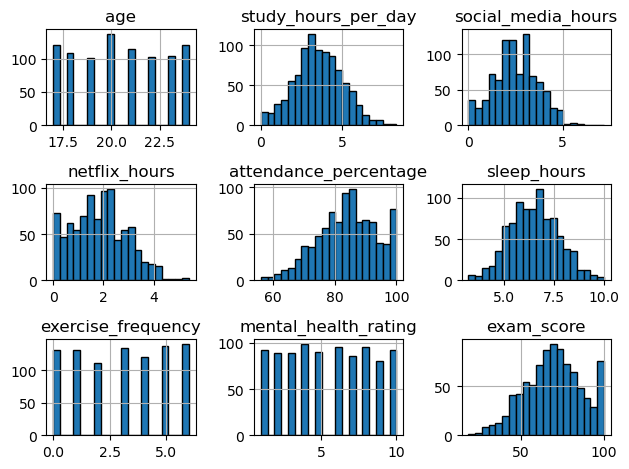

In [22]:
df.hist(bins = 20, edgecolor = "black")
plt.tight_layout()
plt.show()

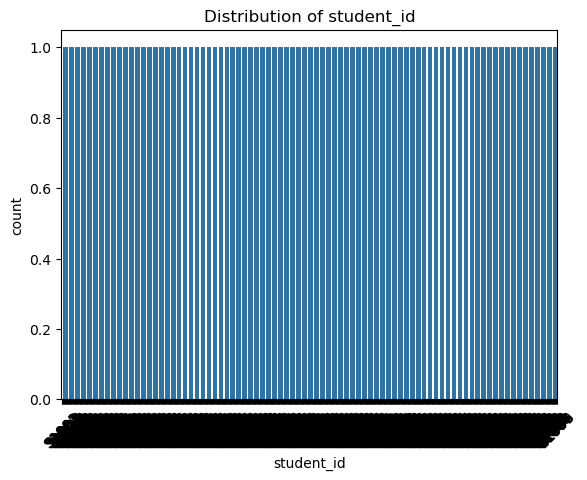

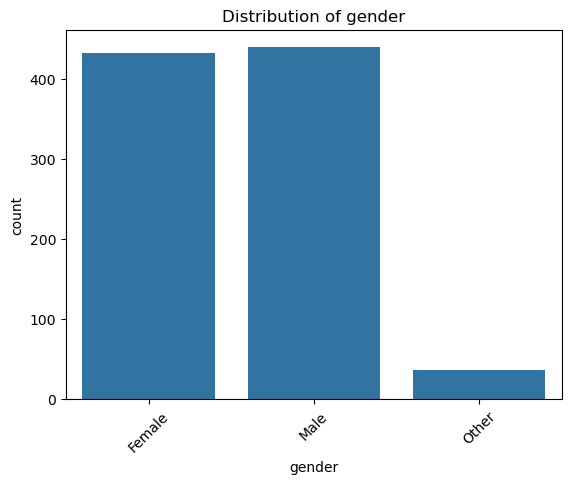

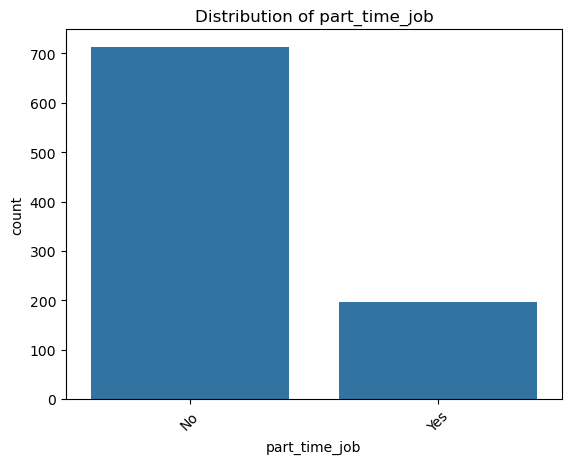

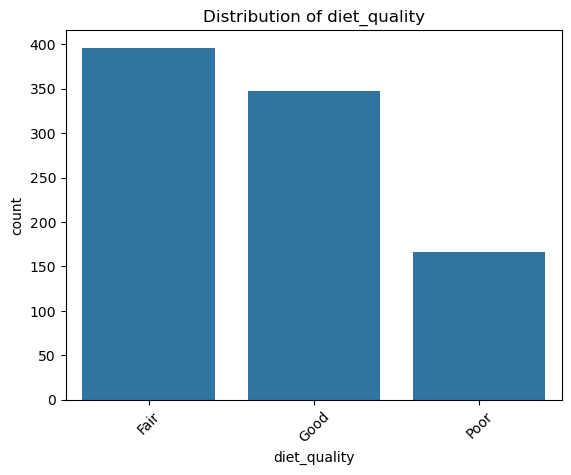

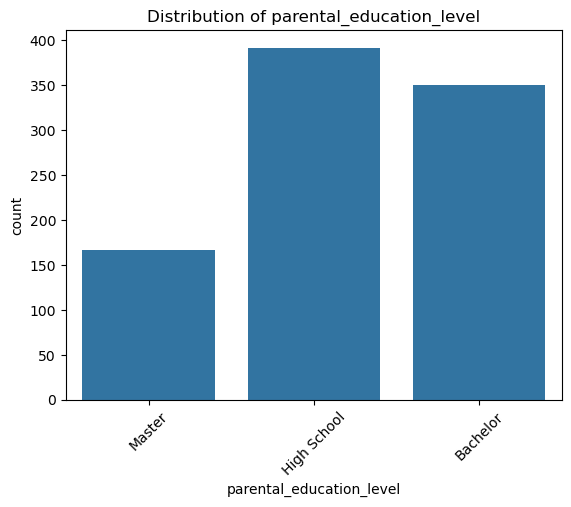

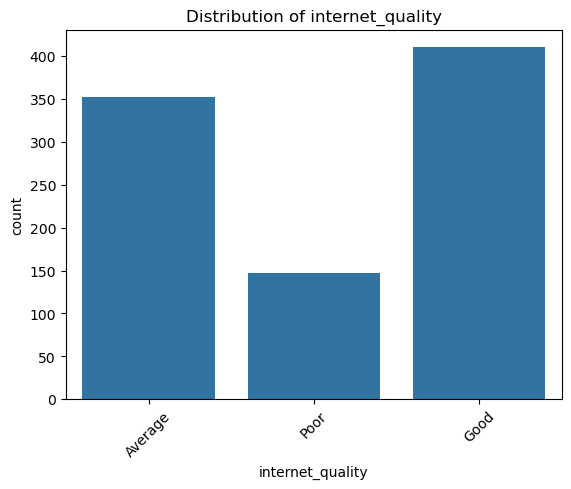

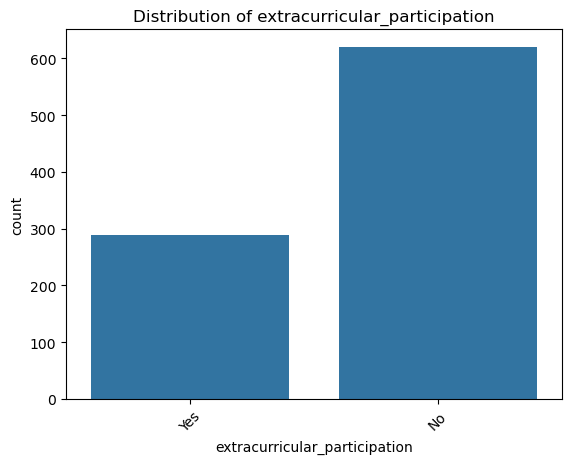

In [27]:
for col in categorical_cols:
    sns.countplot(data = df, x = col)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation = 45)
    plt.show()

In [29]:
df.corr(numeric_only = True)

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score
age,1.000000,0.007150,-0.023854,0.005841,-0.030203,0.040498,-0.005718,-0.052137,-0.012833
study_hours_per_day,0.007150,1.000000,0.007364,-0.014493,0.028967,-0.026241,-0.024708,-0.015896,0.822950
social_media_hours,-0.023854,0.007364,1.000000,0.011865,0.049356,0.026861,-0.023975,-0.000417,-0.171672
netflix_hours,0.005841,-0.014493,0.011865,1.000000,-0.015008,-0.017006,-0.004155,-0.016612,-0.166578
attendance_percentage,-0.030203,0.028967,0.049356,-0.015008,1.000000,0.001972,-0.010563,-0.017096,0.096005
sleep_hours,0.040498,-0.026241,0.026861,-0.017006,0.001972,1.000000,0.030013,-0.010653,0.122294
exercise_frequency,-0.005718,-0.024708,-0.023975,-0.004155,-0.010563,0.030013,1.000000,-0.001500,0.161397
mental_health_rating,-0.052137,-0.015896,-0.000417,-0.016612,-0.017096,-0.010653,-0.001500,1.000000,0.317945
exam_score,-0.012833,0.822950,-0.171672,-0.166578,0.096005,0.122294,0.161397,0.317945,1.000000


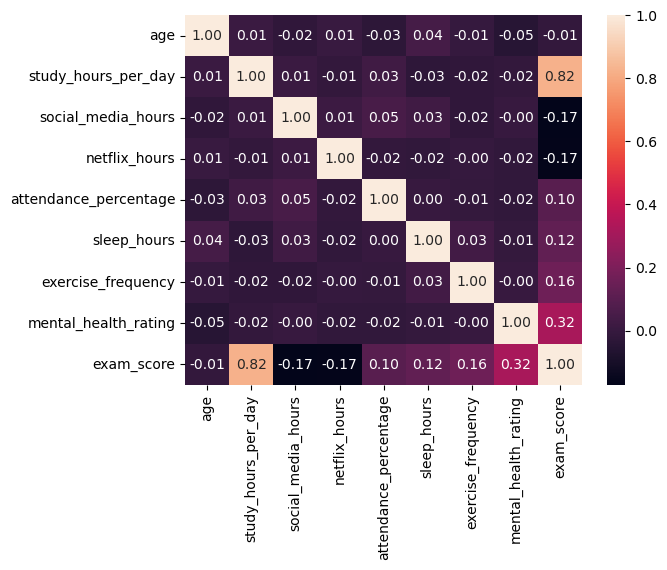

In [30]:
sns.heatmap(df.corr(numeric_only = True), annot= True, fmt = ".2f")
plt.show()

In [32]:
df.describe().columns

Index(['age', 'study_hours_per_day', 'social_media_hours', 'netflix_hours',
       'attendance_percentage', 'sleep_hours', 'exercise_frequency',
       'mental_health_rating', 'exam_score'],
      dtype='object')

In [33]:
num_cols = ['age', 'study_hours_per_day', 'social_media_hours', 'netflix_hours',
       'attendance_percentage', 'sleep_hours', 'exercise_frequency',
       'mental_health_rating', 'exam_score']

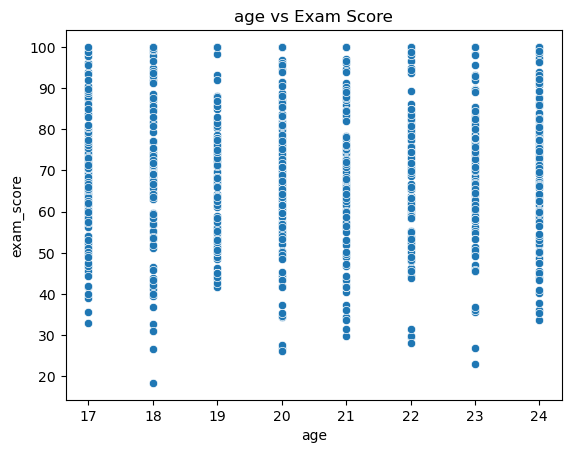

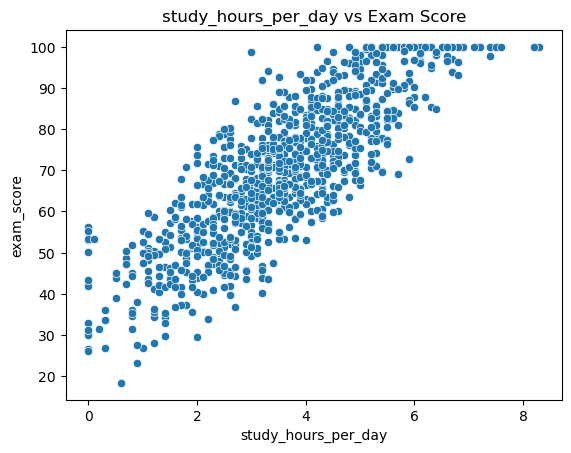

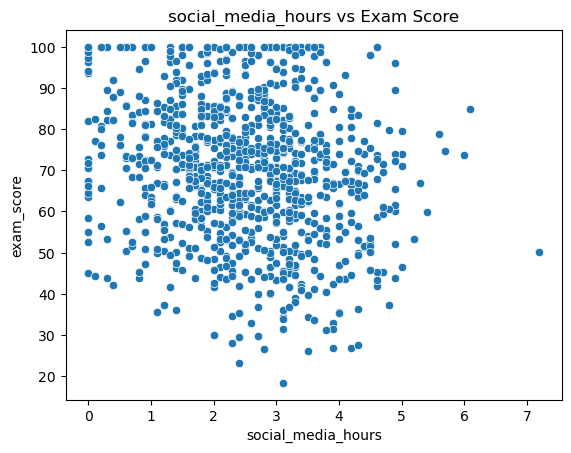

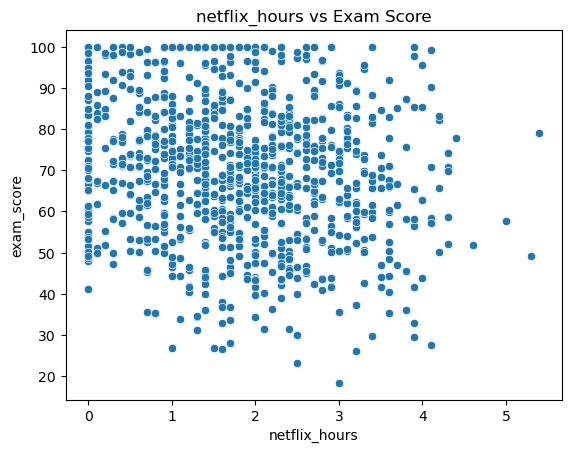

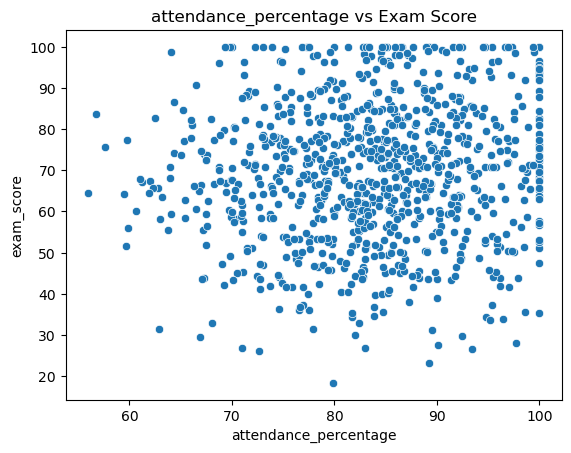

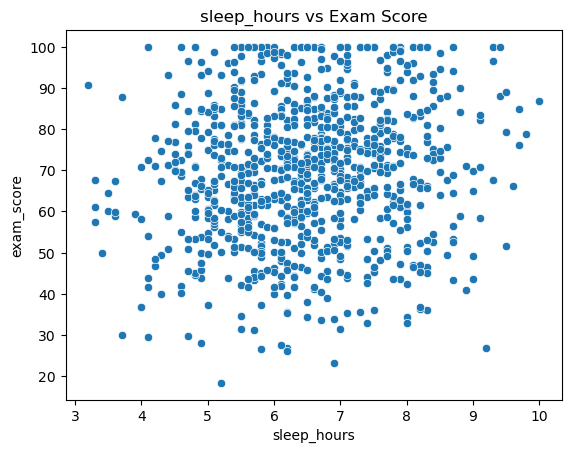

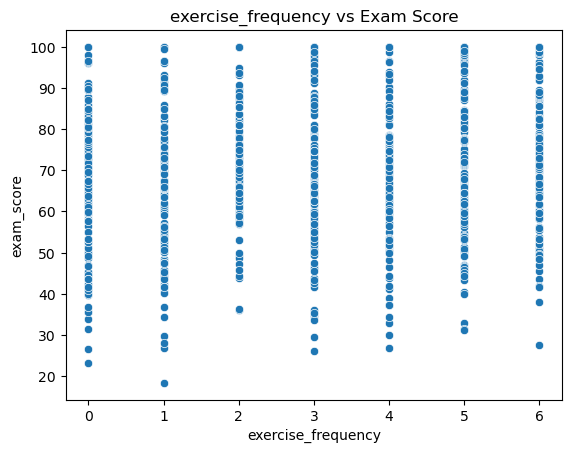

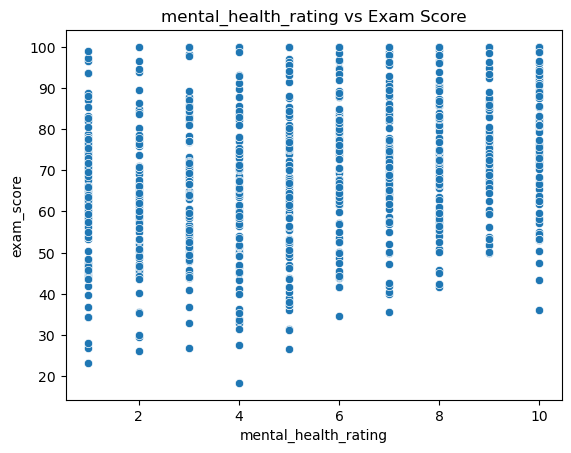

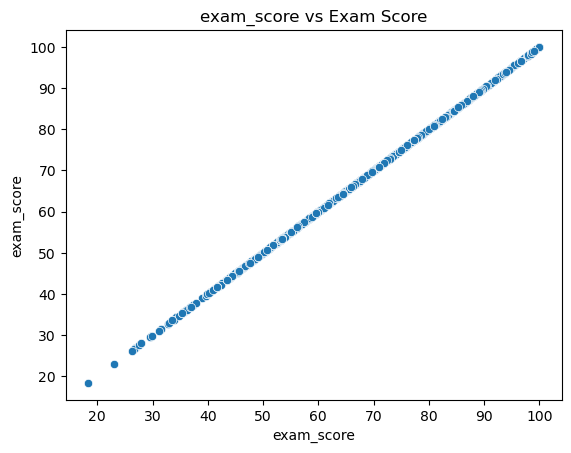

In [34]:
for col in num_cols:
    sns.scatterplot(data = df, x = col, y = "exam_score")
    plt.title(f"{col} vs Exam Score")
    plt.show()

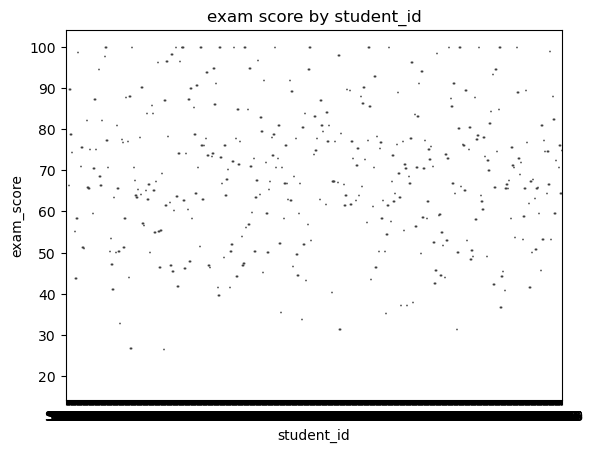

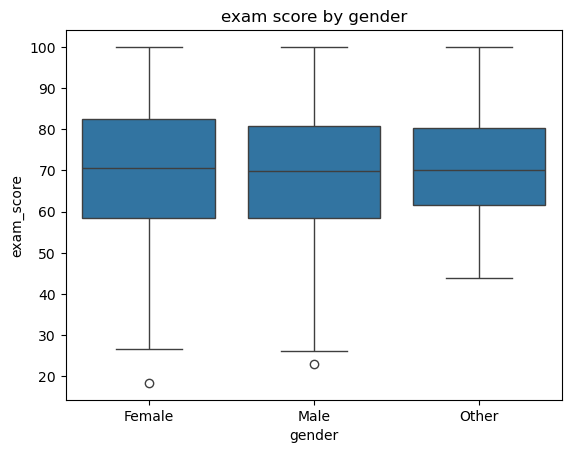

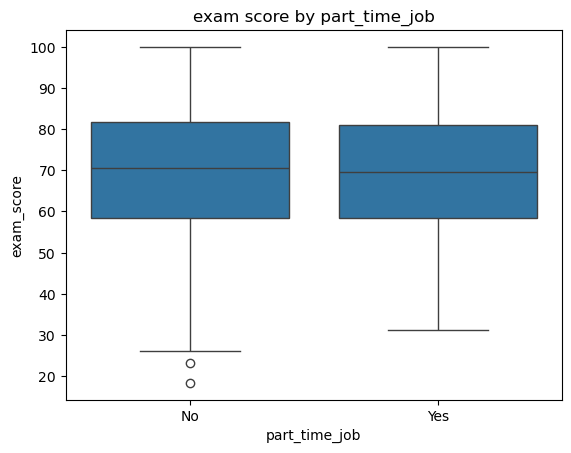

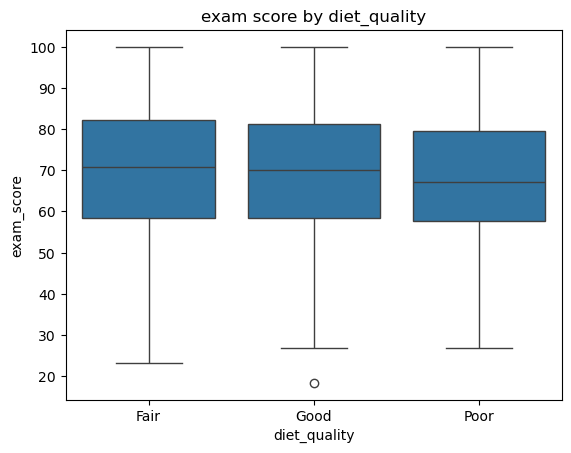

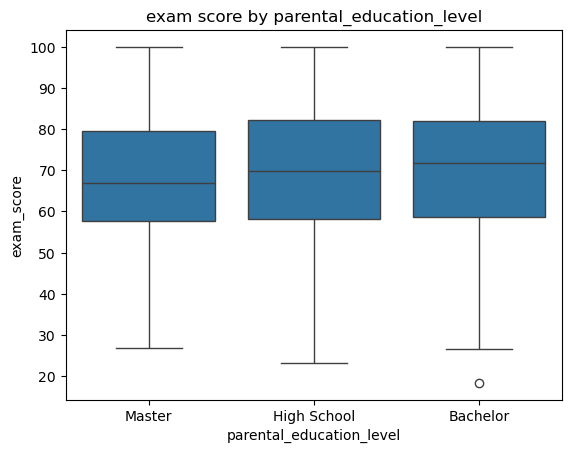

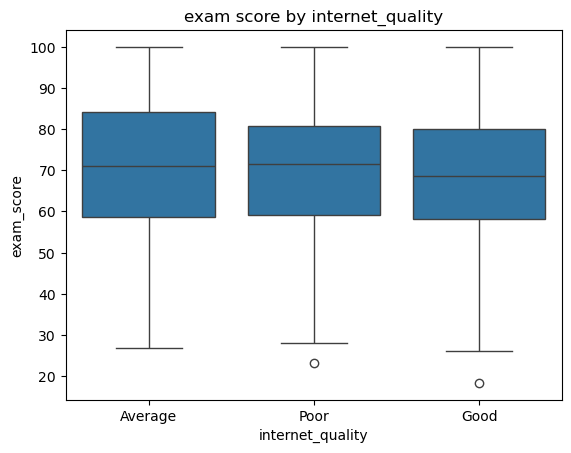

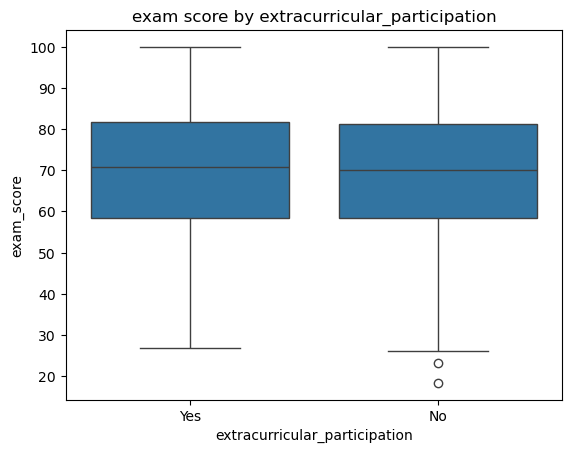

In [35]:
for col in categorical_cols:
    sns.boxplot(data = df, x = col, y = "exam_score")
    plt.title(f"exam score by {col}")
    plt.show()

In [71]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [38]:
df.columns

Index(['student_id', 'age', 'gender', 'study_hours_per_day',
       'social_media_hours', 'netflix_hours', 'part_time_job',
       'attendance_percentage', 'sleep_hours', 'diet_quality',
       'exercise_frequency', 'parental_education_level', 'internet_quality',
       'mental_health_rating', 'extracurricular_participation', 'exam_score'],
      dtype='object')

In [39]:
features = ['study_hours_per_day', 'attendance_percentage', 'mental_health_rating', 'sleep_hours', 'part_time_job']

In [41]:
target = "exam_score"

In [46]:
df_model = df[features + [target]].copy()

In [47]:
df_model

,study_hours_per_day,attendance_percentage,mental_health_rating,sleep_hours,part_time_job,exam_score
0,0.0,85.0,8,8.0,No,56.2
1,6.9,97.3,8,4.6,No,100.0
2,1.4,94.8,1,8.0,No,34.3
3,1.0,71.0,1,9.2,No,26.8
4,5.0,90.9,1,4.9,No,66.4
...,...,...,...,...,...,...
995,2.6,77.0,6,7.5,No,76.1
996,2.9,86.0,6,6.8,Yes,65.9
997,3.0,61.9,9,6.5,No,64.4
998,5.4,100.0,1,7.6,Yes,69.7


In [48]:
le = LabelEncoder()

In [50]:
df_model["part_time_job"] = le.fit_transform(df_model["part_time_job"])

In [52]:
df_model

,study_hours_per_day,attendance_percentage,mental_health_rating,sleep_hours,part_time_job,exam_score
0,0.0,85.0,8,8.0,0,56.2
1,6.9,97.3,8,4.6,0,100.0
2,1.4,94.8,1,8.0,0,34.3
3,1.0,71.0,1,9.2,0,26.8
4,5.0,90.9,1,4.9,0,66.4
...,...,...,...,...,...,...
995,2.6,77.0,6,7.5,0,76.1
996,2.9,86.0,6,6.8,1,65.9
997,3.0,61.9,9,6.5,0,64.4
998,5.4,100.0,1,7.6,1,69.7


In [53]:
X = df_model[features]

In [54]:
y = df_model[target]

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [56]:
len(y_test)

182

In [57]:
len(y_train)

727

In [72]:
models = {
    "LinearRegression": {
        "model": LinearRegression(),
        "params": {}
    },
    "DecisionTree": {
        "model": DecisionTreeRegressor(),
        "params": {"max_depth": [3,5,10], "min_samples_split": [2,5]}
    },
    "RandomForest": {
        "model": RandomForestRegressor(),
        "params": {"n_estimators": [50,100], "max_depth": [5,10]}
    }
}

In [73]:
best_models = []

In [74]:
for name, config in models.items():
    print(f"Training {name}")

    grid = GridSearchCV(config["model"], config["params"], cv= 5, scoring= "neg_mean_squared_error")
    grid.fit(X_train, y_train)

    y_pred = grid.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test,y_pred)

    best_models.append({
        "model": name,
        "best_params": grid.best_params_,
        "rmse": rmse,
        "r2": r2
    })

Training LinearRegression
Training DecisionTree
Training RandomForest


In [75]:
result_df = pd.DataFrame(best_models)

In [77]:
result_df.sort_values(by="rmse")

,model,best_params,rmse,r2
0,LinearRegression,{},7.593118,0.778310
2,RandomForest,"{'max_depth': 5, 'n_estimators': 50}",8.169776,0.743359
1,DecisionTree,"{'max_depth': 5, 'min_samples_split': 2}",8.871111,0.697405


In [78]:
import joblib

best_row = result_df.sort_values(by = "rmse").iloc[0]

In [79]:
best_row

model          LinearRegression
best_params                  {}
rmse                   7.593118
r2                      0.77831
Name: 0, dtype: object

In [80]:
best_model_name = best_row["model"]

In [81]:
best_model_name

'LinearRegression'

In [82]:
best_model_config = models[best_model_name]

In [83]:
best_model_config

{'model': LinearRegression(), 'params': {}}

In [84]:
final_model = best_model_config["model"]

In [85]:
final_model.fit(X,y)

LinearRegression()

In [88]:
joblib.dump(final_model, "best_model.pkl")

['best_model.pkl']

In [89]:
joblib.load("best_model.pkl").predict(X_test)

array([ 92.69074923,  54.97205488,  66.75598134,  89.44570348,
        59.04507085,  75.5095826 ,  64.22442454,  97.95605523,
        81.11499936,  54.69003354,  72.22004207,  54.1809859 ,
        48.17243843,  68.26348682,  80.15376333,  63.52287934,
        66.36405947,  78.38357408,  62.717919  ,  73.50744843,
        85.86069868,  81.1148883 ,  74.7216201 ,  82.34672584,
        57.8301418 ,  93.21245749,  85.58995874,  83.98286524,
        77.22484193,  70.10700083,  49.82715484,  76.36598796,
        68.37208385,  52.38051753,  80.46594508,  76.46225033,
        56.40314637,  74.91557123,  42.15404292,  77.0077602 ,
        60.61304698,  86.33867011,  88.45015169,  55.03445016,
        60.36098639,  98.05726756,  61.10409062,  84.75734186,
        60.9230965 ,  83.72423392,  42.98530424,  80.25838196,
        38.72620623,  50.09576014,  86.35977735,  73.63843002,
        40.60113112,  72.64278476,  69.78701234,  73.26225406,
        69.53796476,  69.19275373,  63.02878767,  52.53